# Sequential Models with the Keras API

These notes are a collection from the book "*Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*" by Aurélien Géron, and various additional sources.

The majority of the information is covered in *Chapter 10 - Introduction to Artificial Neural Network with Keras*



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

tf.__version__


'2.3.0'

## Simple Image Classifier Using the Sequential API

The `Keras` api makes creating sequential models super easy. At its core, a *sequential* model is a neural network that has all of the individual neurons connected to every neuron in the following layer in sequence.  

The notes include an example of using the `fashion_mnist` dataset and building out the model a few different ways.

In [2]:
# Using the keras.datasets load the fashion_mnist

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Vewing the shape of the dataset

print(x_train_full.shape)
print(x_train_full.dtype)

In [3]:
# divide into a validation set and re-scale by 255

x_valid, x_train = x_train_full[:50000] / 255.0, x_train_full[50000:] / 255.0
y_valid, y_train = y_train_full[:50000], y_train_full[50000:]

### Hold up!  Why divide by 255 ??

The function of ** / 255 ** rescales the images so that the values are between 0 - 1. 

### How you may ask?

Picture images are a series of pixels in a grid and each pixel holds a value.  The value pertains to the amount of lightness/darkness on a range of 0 - 255.  There are additional data points like RGB channels, but that'll be covered in other notes.


In [4]:
# Deine the classes in the dataset

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

#### Create the model with individual lines by adding to a model instance

In [5]:
# Creating the model a few different ways

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) # use softmax for while prediction classes

#### So like what the heck is this doing?

Simple!  Keras makes this very easy for simple sequence models.  

* First line creates the `Sequential` model instance
* Second line creates a layer to `Flatten` the image into a 1D array.  It reshapes the data into `.reshape(-1,1)`.  Contains no parameters
    * You could use `tf.keras.layers.InputLayer` and set the `input_shape=[28,28]`
* Third and Fourth lines create a `Dense` layer which means all of the neurons are connected to each other.  It uses the `relu` activation function
* Fourth line is 10 neurons that correspond to the 10 classes and then uses the `softmax` because the classes are exclusive

#### Here is a better way using a wrapper function

In [6]:
# Here is a more programmic way of doing it
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### How do you read that?

First off, this output shows the model type as `sequential`.  Then goes into the layers; flatten and then 3 dense. 

For example, the first hidden layer has 784 * 300 connections and 300 bias terms.


### Exploring the wieghts and other options from the model

In [ ]:
# Accessing the weights
hidden1 = model.layers[1]
hidden1.name


In [ ]:
hidden1.get_config()

In [ ]:
hidden1.get_weights() # Two arrays that correspond to weights, basis

### Compile the model

In [ ]:
# compile

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


### Fit the model

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

In [ ]:
### Use pyplot to visualize the history object as a pandas dataframe

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
### Evaluate the model

In [ ]:
model.evaluate(x_test, y_test)

## Building a regression MLP using the Sequential API

Using a different type of model to predict the boston pricing

In [ ]:
housing = tf.keras.datasets.boston_housing

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [44]:
housing = fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [ ]:
# BUILD IT!

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(1) # only one prediction cause we are doing houses
])

model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
# Fit the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

In [ ]:
mse_test = model.evaluate(x_test, y_test)

In [ ]:
mse_test

In [ ]:
x_new = x_test[:3]
x_new

In [ ]:
y_pred = model.predict(x_new)

In [ ]:
y_pred

## Completely Different now.  The Functional API

Functional API allows for different types of nonsequential nns.  So like a 'Wide and Deep' type of model.  That is when a model is connected to one `concat` layer and multiple hidden layers.

In [ ]:
input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

### Exaplain that smart ass

Well!  This is a little different than the other ones.  So here we go...

When using the funcational api, you can connect any number of layers to other ones.  So for this example with the `model.summary`, the input_ layer is connected to BOTH the dense_ and concat layer.  

You define this follow by immediately calling the layer as a function with an arguement at the end of the `tf.keras.layers`. HENCE! The `funcational api` is born.

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")
# Fit the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

# This produces a bunch of garbge cause the model layers don't really make sense 
# this is just an example

## Passing Subsets of inputs to a different layer

In [46]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output =  tf.keras.layers.Dense(1, name="output")(concat)
model = tf.keras.Model(inputs=[input_A, input_B], outputs=[output])


In [47]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
_______________________________________________________________________________________

In [49]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

x_train_A, x_train_B = x_train[:, :5], x_train[:,2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:,2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:,2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]


In [55]:
print(x_train_A.shape)
print(x_train_B.shape)
print(x_train.shape)

(11610, 5)
(11610, 6)
(11610, 8)


In [56]:
history = model.fit((x_train_A, x_train_B), y_train, epochs=20, validation_data=((x_valid_A, x_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1619 - val_loss: 1.0079
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8443 - val_loss: 0.7329
Epoch 3/20
363/363 [==============================] - 0s 996us/step - loss: 0.6905 - val_loss: 0.6539
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6367 - val_loss: 0.6156
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6075 - val_loss: 0.5895
Epoch 6/20
363/363 [==============================] - 0s 972us/step - loss: 0.5874 - val_loss: 0.5709
Epoch 7/20
363/363 [==============================] - 0s 970us/step - loss: 0.5728 - val_loss: 0.5560
Epoch 8/20
363/363 [==============================] - 0s 957us/step - loss: 0.5615 - val_loss: 0.5434
Epoch 9/20
363/363 [==============================] - 0s 961us/step - loss: 0.5515 - val_loss: 0.5340
Epoch 10/20
363/363 [==============================] - 0s 997us/step - loss: 0.5437 - val_

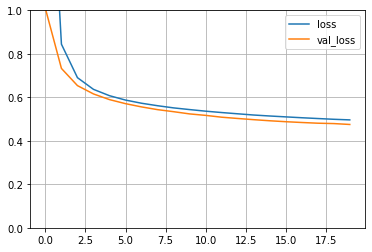

In [59]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Multiple outputs

In [60]:
# Using the same idea as above

input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output =  tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)
model = tf.keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [61]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
_______________________________________________________________________________________

In [62]:
# We will need to adjust the weights for the loss

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    (x_train_A, x_train_B), 
    [y_train, y_train], 
    epochs=20, 
    validation_data=(
            (x_valid_A, x_valid_B), [y_valid, y_valid]
        )
    )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8867 - output_loss: 0.7856 - aux_output_loss: 1.7969 - val_loss: 0.5654 - val_output_loss: 0.5065 - val_aux_output_loss: 1.0958
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5937 - output_loss: 0.5536 - aux_output_loss: 0.9553 - val_loss: 0.5374 - val_output_loss: 0.5023 - val_aux_output_loss: 0.8529
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5208 - output_loss: 0.4895 - aux_output_loss: 0.8026 - val_loss: 0.4812 - val_output_loss: 0.4511 - val_aux_output_loss: 0.7523
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4975 - output_loss: 0.4720 - aux_output_loss: 0.7277 - val_loss: 0.4667 - val_output_loss: 0.4404 - val_aux_output_loss: 0.7028
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4819 - output_loss: 0.4593 - aux_output_loss: 0.6850 - val_loss: 0.4588 - val_output_loss: 0.4346 - val_aux_

### Subclassing the API to build dynamic models

The sequential api and the functional api are declarative.  You ***declare*** which layesr you want to use and how they should be connected.  Then you feed the data for training or inference.  

Pros:
* Model is easily saved, cloned or shared
* Structure is easily analyzed
* Easy debugging

Cons:
* it's static
* no fancy loops, varying shapes, conditional branching

So! Let's look at subclassing the model api.



In [64]:
# Build the same deep and wide model as above

class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

### Why is this so important?

You can do almost anything with the `call()` method.  You can add loops, if statements, and other operations.  Great for researchers and new ideas.

Cons:
* Arch is hidden within the `call()` method, so Keras can not inspect important
* Keras can not check types or shapes ahead of time

## Using Callbacks

Using callbacks lets you specify a list of objects that keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.  

For example, the `ModelCheckpoint` callback saves checkpoints of the model at regular intervals

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "model_saved.h5",
    save_best_only=True # saves only the best model
)

# early stopping 
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, 
    restore_best_weights=True)

history = model.fit(
    x_train, 
    y_train, 
    epochs=10,
    validation_data=(x_valid, y_valid) 
    callbacks=[checkpoint_cb, early_stopping_cb])

# Since we are using earlystopping, the model will stop training after there is not any more improvements. 
# there is no need to restore the best model saved by the ES callback will restore it for you at the end of training

### Callbacks and lifecycle hooks

Not sure if it is correct to call them *lifecycle hooks*.  But you can write your own CBs using these methods:

* on_train_begin() / on_train_end()
* on_epoch_begin() / on_epoch_end()
* on_batch_begin() / on_batch_end()

For evaluation, 
* on_test***
* on_test_batch**

For predict,
* on_predict**
* on_predict_batch**

In [ ]:
# for example

class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))